# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiento que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize

0.7071067811865476

In [33]:
theta = np.pi/4    # Ángulo de lanzamiento en [rad].
v0 = 55     # Velocidad inicial de la bola dada en [m/s]
v0x = v0*np.cos(theta)    # Velocidad inicial horizontal de la bola dada en [m/s] 
v0y = v0*np.sin(theta)    # Velocidad inicial vertical de la bola dada en [m/s] 
b = 0.005   # Coeficiente de rozamiento con el aire. 
g = 9.8   # Gravedad dada en [m/s^2]

y = lambda R, theta, v0x, v0y, b, g: (g/b + v0y)*(R/v0x) + (g/b**2)*np.log(1-(R*b/v0x))
y1 = lambda R: ((9.8/0.005) + 55*np.sin(np.pi/4))*(R/(55*np.sin(np.pi/4))) + (9.8/0.005**2)*np.log(1-(R*0.005/(55*np.cos(np.pi/4))))

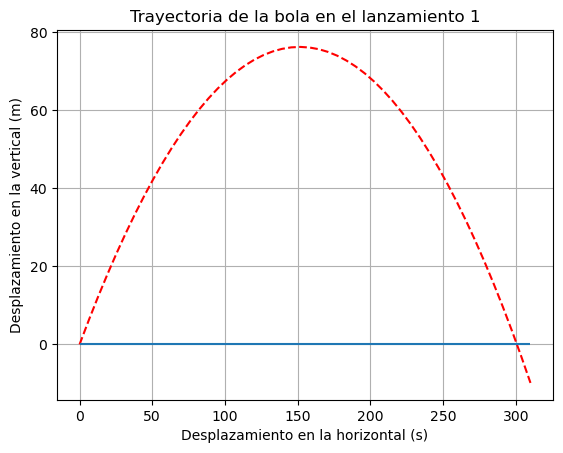

In [73]:
X = np.linspace(0, 310, 50)
Y = y1(X)

plt.plot(X, Y, 'r--', label= '')
plt.title('Trayectoria de la bola en el lanzamiento 1')
plt.ylabel('Desplazamiento en la vertical (m)')
plt.xlabel('Desplazamiento en la horizontal (s)')
plt.hlines(0, 0, 310)
plt.grid()
plt.show()


In [57]:
R1 = optimize.bisect(y1, 295, 305)
print('La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la bisección es: ', R1)

La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la bisección es:  300.69207669317507


In [58]:
R2 = optimize.newton(y1, 299)
print('La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la secante es: ', R2)

La altura máxima alcanzada en el primer lanzamiento de acuerdo con el método de la secante es:  300.6920766931835


In [61]:
tv_1_b = (-1/b)*np.log(1-(R1*b/(v0x)))
tv_1_s = (-1/b)*np.log(1-(R2*b/(v0x)))

print('De acuerdo con el método de la bisección, el tiempo de vuelo para el primer lanzamiento es: ', tv_1_b)
print('De acuerdo con el método de la secante, el tiempo de vuelo para el primer lanzamiento es: ', tv_1_s)

De acuerdo con el método de la bisección, el tiempo de vuelo para el primer lanzamiento es:  7.885101833163787
De acuerdo con el método de la secante, el tiempo de vuelo para el primer lanzamiento es:  7.885101833164018


In [65]:
x_ = lambda t: (v0x/b)*(1-np.exp(-b*t))
y_ = lambda t: (1/b)*((g/b)+v0y)*(1-np.exp(-b*t))-(g/b)*t
t_ = np.linspace(0, 7.8, 100)
X_ = x_(t_)
Y_ = y_(t_)

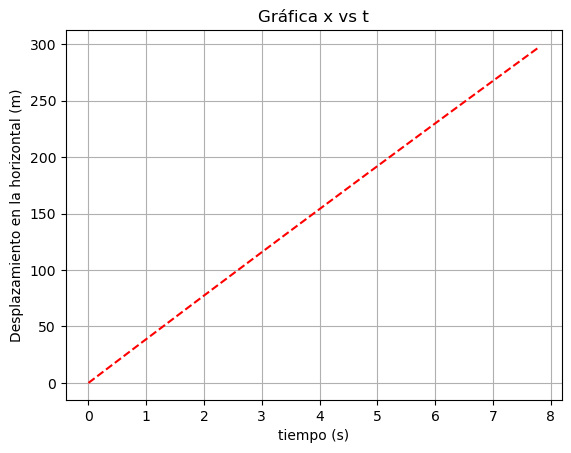

In [70]:
plt.plot(t_, X_, 'r--')
plt.title('Gráfica x vs t')
plt.ylabel('Desplazamiento en la horizontal (m)')
plt.xlabel('tiempo (s)')
plt.grid()
plt.show()

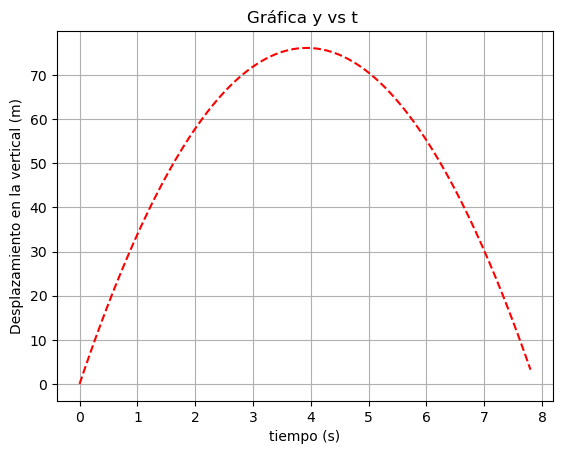

In [71]:
plt.plot(t_, Y_, 'r--')
plt.title('Gráfica y vs t ')
plt.ylabel('Desplazamiento en la vertical (m)')
plt.xlabel('tiempo (s)')
plt.grid()
plt.show()

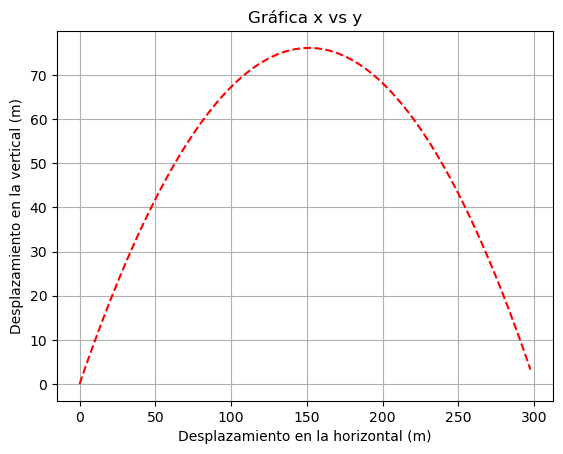

In [72]:
plt.plot(X_, Y_, 'r--')
plt.title('Gráfica x vs y')
plt.ylabel('Desplazamiento en la vertical (m)')
plt.xlabel('Desplazamiento en la horizontal (m)')
plt.grid()
plt.show()

In [116]:
theta_=np.arange(0, 90, 5)
theta_=np.deg2rad(theta_)

theta[1::]

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694,
       1.3962634 , 1.48352986])

In [119]:
theta_=np.arange(0, 90, 5)
theta_=np.deg2rad(theta_)

b = 0.009
v0 = 40     # Velocidad inicial de la bola dada en [m/s]
v0x = v0*np.cos(theta)    # Velocidad inicial horizontal de la bola dada en [m/s] 
v0y = v0*np.sin(theta)    # Velocidad inicial vertical de la bola dada en [m/s] 

yf = lambda R, theta: ((9.8/0.009) + 40*np.sin(theta))*(R/(40*np.sin(theta))) + (9.8/0.009**2)*np.log(1-(R*0.009/(40*np.cos(theta))))

yf_ = yf(R,theta[1::])




array([  85709.74199895,   38828.06792077,   23141.39287306,
         15193.18401065,   10282.65996087,    6830.2685325 ,
          4142.14111274,    1848.03768751,    -291.17469931,
         -2469.52583161,   -4891.9591976 ,   -7837.39532648,
        -11774.74901038,  -17655.6517554 ,  -27884.42432544,
        -51114.6940469 , -172635.03706159])

TypeError: 'float' object is not callable